12:01:23 - cmdstanpy - INFO - Chain [1] start processing
12:01:23 - cmdstanpy - INFO - Chain [1] done processing
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k

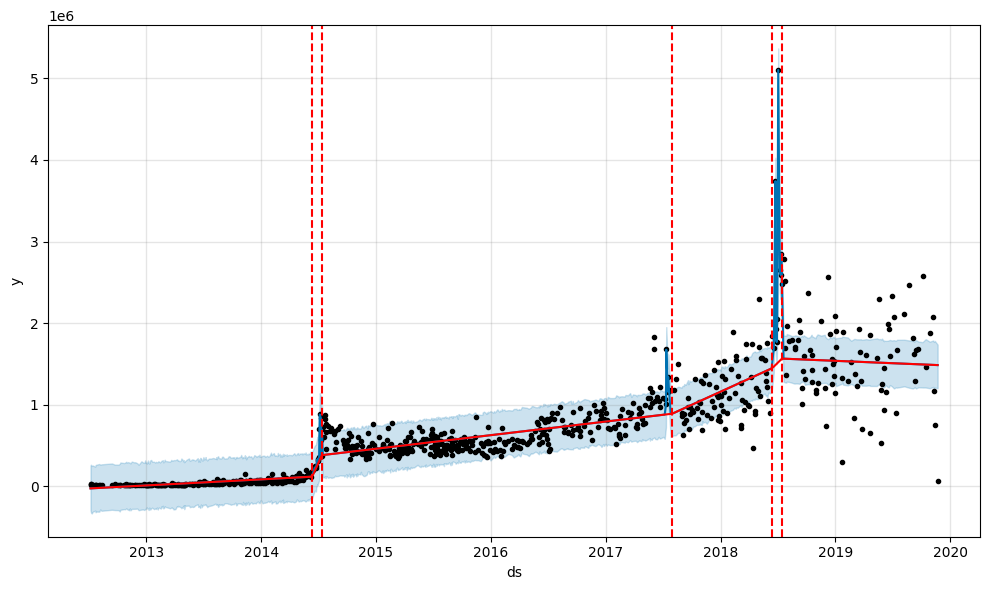

/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


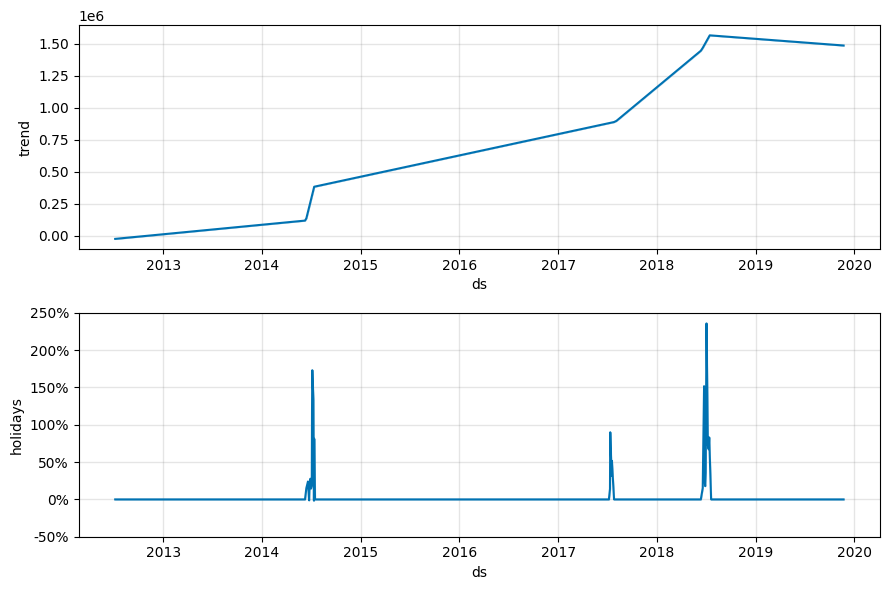

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/instagram_jamesrodriguez10.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

wc_2014 = pd.DataFrame({'holiday': 'World Cup 2014',
                       'ds':pd.to_datetime(['2014-06-12']),
                       'lower_window': 0,
                       'upper_window': 31})
wc_2018 = pd.DataFrame({'holiday': 'World Cup 2018',
                       'ds':pd.to_datetime(['2018-06-14']),
                       'lower_window': 0,
                       'upper_window': 31})
signing = pd.DataFrame({'holiday': 'Bayern Munich',
                       'ds':pd.to_datetime(['2017-07-11']),
                       'lower_window': 0,
                       'upper_window': 14})
special_events = pd.concat([wc_2014, wc_2018, signing])

changepoints = ['2014-06-12',
                '2014-07-13',
                '2017-07-11',
                '2017-07-31',
                '2018-06-14',
                '2018-07-15']

model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

12:05:45 - cmdstanpy - INFO - Chain [1] start processing
12:05:46 - cmdstanpy - INFO - Chain [1] done processing
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k

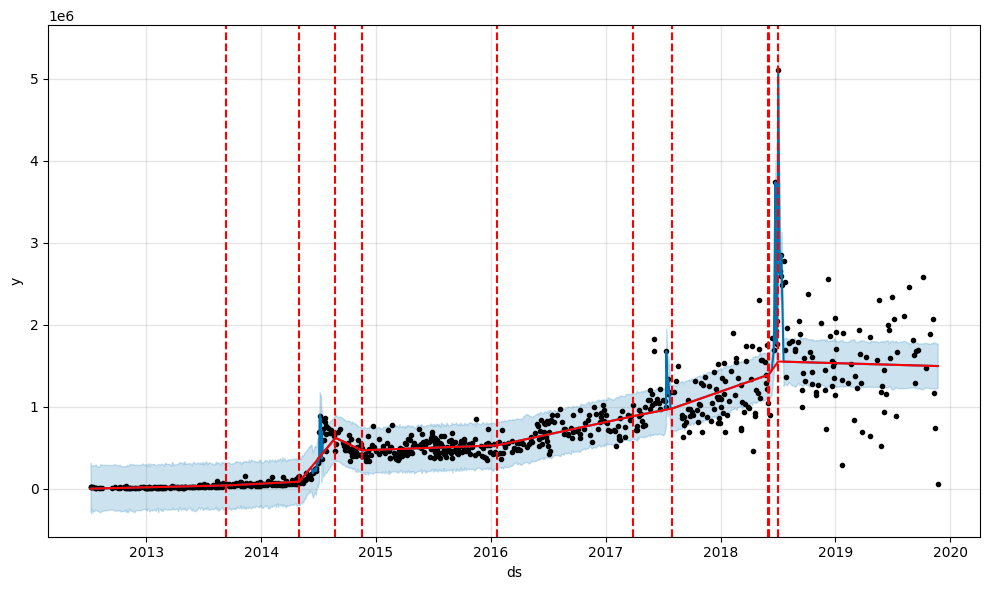

In [10]:
import numpy as np

def set_changepoints(df, n_changepoints=25, changepoint_range=0.8):
    df = df.sort_values('ds').reset_index(drop=True)
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of observations. Using {}.'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = (np.linspace(0, hist_size - 1, n_changepoints + 1).round().astype(int))
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

changepoints = set_changepoints(df, 5, 0.8)
new_changepoints = pd.Series(pd.to_datetime(['2014-05-02',
                                             '2014-08-25',
                                             '2017-07-31',
                                             '2018-06-14',
                                             '2018-06-04',
                                             '2018-07-03']))
changepoints = pd.concat([changepoints, new_changepoints])
changepoints = changepoints.sort_values().reset_index(drop=True)

model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()